In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
file_dir = "/content/drive/MyDrive/Data Analysis"
os.chdir(file_dir)

In [ ]:
!ls

 credit_scoring.csv				      'Sales Data.xlsx'
'Mini Portfolio Muhammad Luthfi Septiawan A-244.pdf'


In [ ]:
df = pd.read_csv("credit_scoring.csv")

In [ ]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


* Age: This feature represents the age of the individual.
* Gender: This feature captures the gender of the individual.
* Marital Status: This feature denotes the marital status of the individual.
* Education Level: This feature represents the highest level of education attained by the individual.
* Employment Status: This feature indicates the current employment status of the individual.
* Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.
* Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.
* Number of Credit Accounts: It represents the count of active credit accounts the person holds.
* Loan Amount: It indicates the monetary value of the loan.
* Interest Rate: This feature represents the interest rate associated with the loan.
* Loan Term: This feature denotes the duration or term of the loan.
* Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

# Check data type

In [ ]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# check null value

In [ ]:
df.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

# Data distribution

In [ ]:
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [ ]:
df.select_dtypes('object').describe()

,Gender,Marital Status,Education Level,Employment Status,Type of Loan
count,1000,1000,1000,1000,1000
unique,2,3,4,3,3
top,Male,Married,Master,Self-Employed,Auto Loan
freq,501,350,262,347,348


In [ ]:
credit_utilization_fig = px.box(df, y='Credit Utilization Ratio',
                                title='Credit Utilization Ratio Distribution')
credit_utilization_fig.show()

In [ ]:
loan_amount_fig = px.histogram(df, x='Loan Amount',
                               nbins=20,
                               title='Loan Amount Distribution')
loan_amount_fig.show()

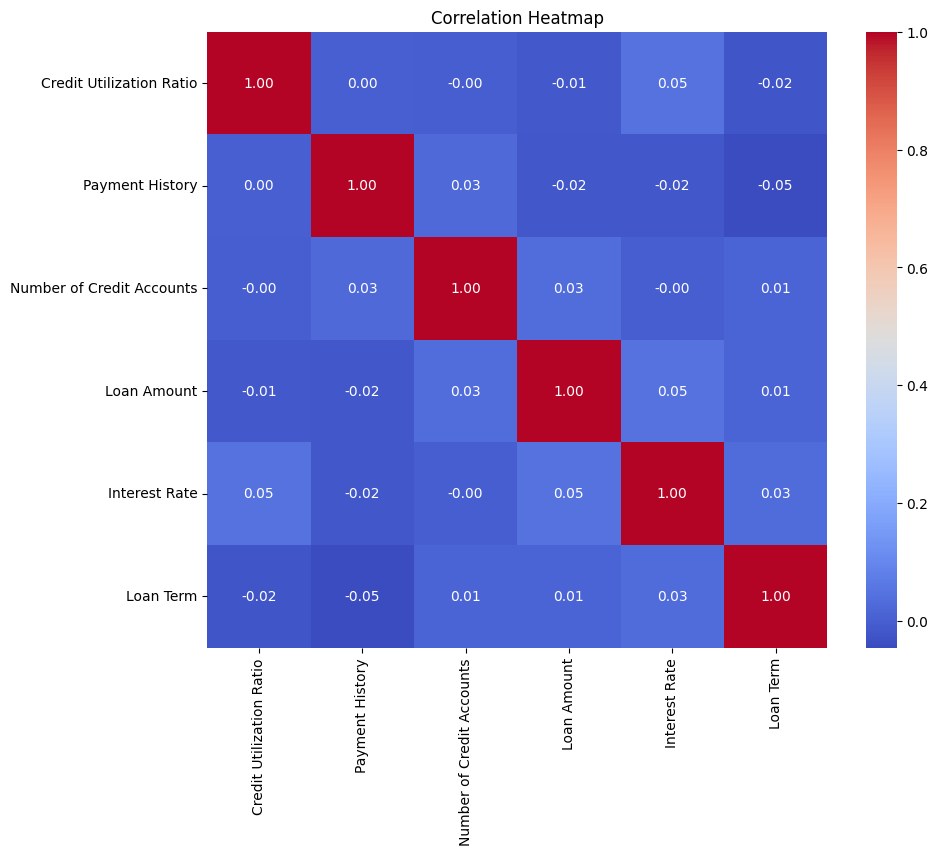

In [ ]:
numeric_df = df[['Credit Utilization Ratio',
                   'Payment History',
                   'Number of Credit Accounts',
                   'Loan Amount', 'Interest Rate',
                   'Loan Term']]

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Calculating Credit Scores using Fair Isaac Corporation (FICO) method




FICO is the most recognizable name in credit scores. The Fair Isaac Corporation (now called FICO), which developed the FICO credit scoring model, says its scores are used by 90% of top U.S. lenders in 90% of lending decisions.

[FICO Method](https://www.investopedia.com/fico-credit-scores-explained-5072985)

## Convert categorical value to numerical value

In [ ]:
df['Education Level'].unique()

array([3, 1, 4, 2])

In [ ]:
df['Employment Status'].unique()

array([1, 0, 2])

In [ ]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
df['Education Level'] = df['Education Level'].map(education_level_mapping)
df['Employment Status'] = df['Employment Status'].map(employment_status_mapping)

35% weight for “Payment History”,
30% weight for “Credit Utilization Ratio”,
15% weight for “Number of Credit Accounts”,
10% weight for “Education Level”,
and 10% weight for “Employment Status”.

In [ ]:
credit_scores = []

for index, row in df.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
df['Credit Score'] = credit_scores

print(df.head())

   Age  Gender Marital Status  Education Level  Employment Status  \
0   60    Male        Married                3                  1   
1   25    Male        Married                1                  0   
2   30  Female         Single                3                  1   
3   58  Female        Married                4                  0   
4   32    Male        Married                2                  2   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  Credit Score  
0      4675000           2.65         48  Personal Loan       

# Modelling for credit segmentation

In [ ]:
from sklearn.cluster import KMeans

X = df[['Credit Score']]
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X)
df['Credit Score Ratings'] = kmeans.labels_

In [ ]:
# Convert the 'Segment' column to category data type
df['Credit Score Ratings'] = df['Credit Score Ratings'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(df, x=df.index, y='Credit Score', color='Credit Score Ratings',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red', 'orange'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

In [ ]:
df['Credit Score Ratings'] = df['Credit Score Ratings'].map({2: 'Very Poor',
                                                             3: 'Fair',
                                                             0: 'Good',
                                                             4: 'Very Good',
                                                             1: "Exceptional"})

# Visualize the segments using Plotly
fig = px.scatter(df, x=df.index, y='Credit Score', color='Credit Score Ratings',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red', 'orange'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()